In [125]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [126]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width',300, 'display.max_columns',500)
%matplotlib inline

In [127]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# go the the dest folder
dest_folder='/content/drive/My Drive/Financial Programming/Mini Project'
os.chdir(dest_folder)
print('\n Current path: ' + os.getcwd())

Mounted at /content/drive

 Current path: /content/drive/My Drive/Financial Programming/Mini Project


In [128]:
!pip install yfinance -U -q


In [129]:
import yfinance as yf
aapl = yf.Ticker("AAPL")
data = aapl.option_chain('2020-12-04')
aapl_option = pd.concat([data[0], data[1]])
exp_dates = ['2020-12-11', '2020-12-18', '2020-12-24', '2020-12-31', '2021-01-08', '2021-01-15', '2021-02-19', '2021-03-19', '2021-04-16', '2021-06-18', '2021-07-16', '2021-09-17', '2022-01-21', '2022-06-17', '2022-09-16', '2023-01-20']
for e in exp_dates:
    temp = aapl.option_chain(e)
    aapl_option = pd.concat([aapl_option, pd.concat([temp[0], temp[1]])])



In [130]:
aapl_option

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL201204C00055000,2020-11-30 15:44:39,55.0,67.67,67.30,67.45,5.299999,8.497674,8.0,23.0,0.000010,True,REGULAR,USD
1,AAPL201204C00060000,2020-11-20 15:04:55,60.0,58.18,62.35,62.45,0.000000,0.000000,216.0,236.0,0.000010,True,REGULAR,USD
2,AAPL201204C00065000,2020-11-23 15:07:00,65.0,51.50,57.30,57.45,0.000000,0.000000,4.0,22.0,0.000010,True,REGULAR,USD
3,AAPL201204C00070000,2020-11-27 16:58:00,70.0,46.85,52.30,52.45,0.000000,0.000000,2.0,3.0,0.000010,True,REGULAR,USD
4,AAPL201204C00075000,2020-11-25 19:11:39,75.0,40.77,47.30,47.45,0.000000,0.000000,1.0,72.0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,AAPL230120P00190000,2020-11-24 16:31:58,190.0,80.30,74.60,75.85,0.000000,0.000000,2.0,1.0,0.354346,True,REGULAR,USD
32,AAPL230120P00195000,2020-10-29 19:53:00,195.0,85.35,82.85,84.50,0.000000,0.000000,NaN,1.0,0.423559,True,REGULAR,USD
33,AAPL230120P00200000,2020-11-24 15:52:36,200.0,90.07,83.35,84.75,0.000000,0.000000,2.0,13.0,0.357001,True,REGULAR,USD
34,AAPL230120P00210000,2020-11-24 15:52:36,210.0,99.37,92.35,93.85,0.000000,0.000000,2.0,14.0,0.360236,True,REGULAR,USD


In [131]:
aapl_data = aapl_option.drop(['contractSymbol', 'lastTradeDate', 'contractSize', 'currency'],1)
aapl_data

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney
0,55.0,67.67,67.30,67.45,5.299999,8.497674,8.0,23.0,0.000010,True
1,60.0,58.18,62.35,62.45,0.000000,0.000000,216.0,236.0,0.000010,True
2,65.0,51.50,57.30,57.45,0.000000,0.000000,4.0,22.0,0.000010,True
3,70.0,46.85,52.30,52.45,0.000000,0.000000,2.0,3.0,0.000010,True
4,75.0,40.77,47.30,47.45,0.000000,0.000000,1.0,72.0,0.000010,True
...,...,...,...,...,...,...,...,...,...,...
31,190.0,80.30,74.60,75.85,0.000000,0.000000,2.0,1.0,0.354346,True
32,195.0,85.35,82.85,84.50,0.000000,0.000000,NaN,1.0,0.423559,True
33,200.0,90.07,83.35,84.75,0.000000,0.000000,2.0,13.0,0.357001,True
34,210.0,99.37,92.35,93.85,0.000000,0.000000,2.0,14.0,0.360236,True


In [132]:
Option_data = pd.read_csv('NBOption.csv')
Option_data


,DataType,Ask,Bid,LastPrice,StockPrice,Strike,Volatility,Volume,time_to_maturity,ImpliedVolatility
0,put,0.10,0.0,0.11,79.40,30.0,0.284654,22,0.128767,1.242191
1,put,0.25,0.0,0.10,71.86,35.0,0.400073,61,0.090411,1.173832
2,put,1.80,0.0,0.40,79.40,40.0,0.284654,5,0.128767,1.442386
3,put,0.20,0.0,0.09,79.54,45.0,0.286563,4,0.123288,0.763674
4,put,0.15,0.0,0.10,72.10,50.0,0.396490,1,0.095890,0.578129
...,...,...,...,...,...,...,...,...,...,...
14248,call,0.10,0.0,0.05,19.26,25.0,0.198330,6,0.602740,0.233406
14249,call,0.30,0.2,0.20,21.20,30.0,0.247322,10,1.413699,0.435553
14250,call,0.15,0.0,0.05,19.74,35.0,0.200913,1,0.936986,0.461919
14251,call,0.35,0.0,0.35,1.86,2.5,0.502372,10,0.128767,1.765626


In [133]:
Option_data_p = Option_data[Option_data['DataType'] == 'put']
Option_data_c = Option_data[Option_data['DataType'] == 'call']
Option_data_p

,DataType,Ask,Bid,LastPrice,StockPrice,Strike,Volatility,Volume,time_to_maturity,ImpliedVolatility
0,put,0.10,0.00,0.11,79.40,30.0,0.284654,22,0.128767,1.242191
1,put,0.25,0.00,0.10,71.86,35.0,0.400073,61,0.090411,1.173832
2,put,1.80,0.00,0.40,79.40,40.0,0.284654,5,0.128767,1.442386
3,put,0.20,0.00,0.09,79.54,45.0,0.286563,4,0.123288,0.763674
4,put,0.15,0.00,0.10,72.10,50.0,0.396490,1,0.095890,0.578129
...,...,...,...,...,...,...,...,...,...,...
7120,put,12.60,11.50,14.20,19.10,30.0,0.238589,0,1.830137,0.625004
7121,put,15.40,14.60,15.20,20.36,35.0,0.232004,17,1.197260,0.000010
7122,put,0.50,0.40,0.40,19.10,16.0,0.197013,20,0.660274,0.274421
7123,put,1.05,0.95,0.95,18.95,18.0,0.196070,5,0.657534,0.247078


In [134]:
Option_data_p

,DataType,Ask,Bid,LastPrice,StockPrice,Strike,Volatility,Volume,time_to_maturity,ImpliedVolatility
0,put,0.10,0.00,0.11,79.40,30.0,0.284654,22,0.128767,1.242191
1,put,0.25,0.00,0.10,71.86,35.0,0.400073,61,0.090411,1.173832
2,put,1.80,0.00,0.40,79.40,40.0,0.284654,5,0.128767,1.442386
3,put,0.20,0.00,0.09,79.54,45.0,0.286563,4,0.123288,0.763674
4,put,0.15,0.00,0.10,72.10,50.0,0.396490,1,0.095890,0.578129
...,...,...,...,...,...,...,...,...,...,...
7120,put,12.60,11.50,14.20,19.10,30.0,0.238589,0,1.830137,0.625004
7121,put,15.40,14.60,15.20,20.36,35.0,0.232004,17,1.197260,0.000010
7122,put,0.50,0.40,0.40,19.10,16.0,0.197013,20,0.660274,0.274421
7123,put,1.05,0.95,0.95,18.95,18.0,0.196070,5,0.657534,0.247078


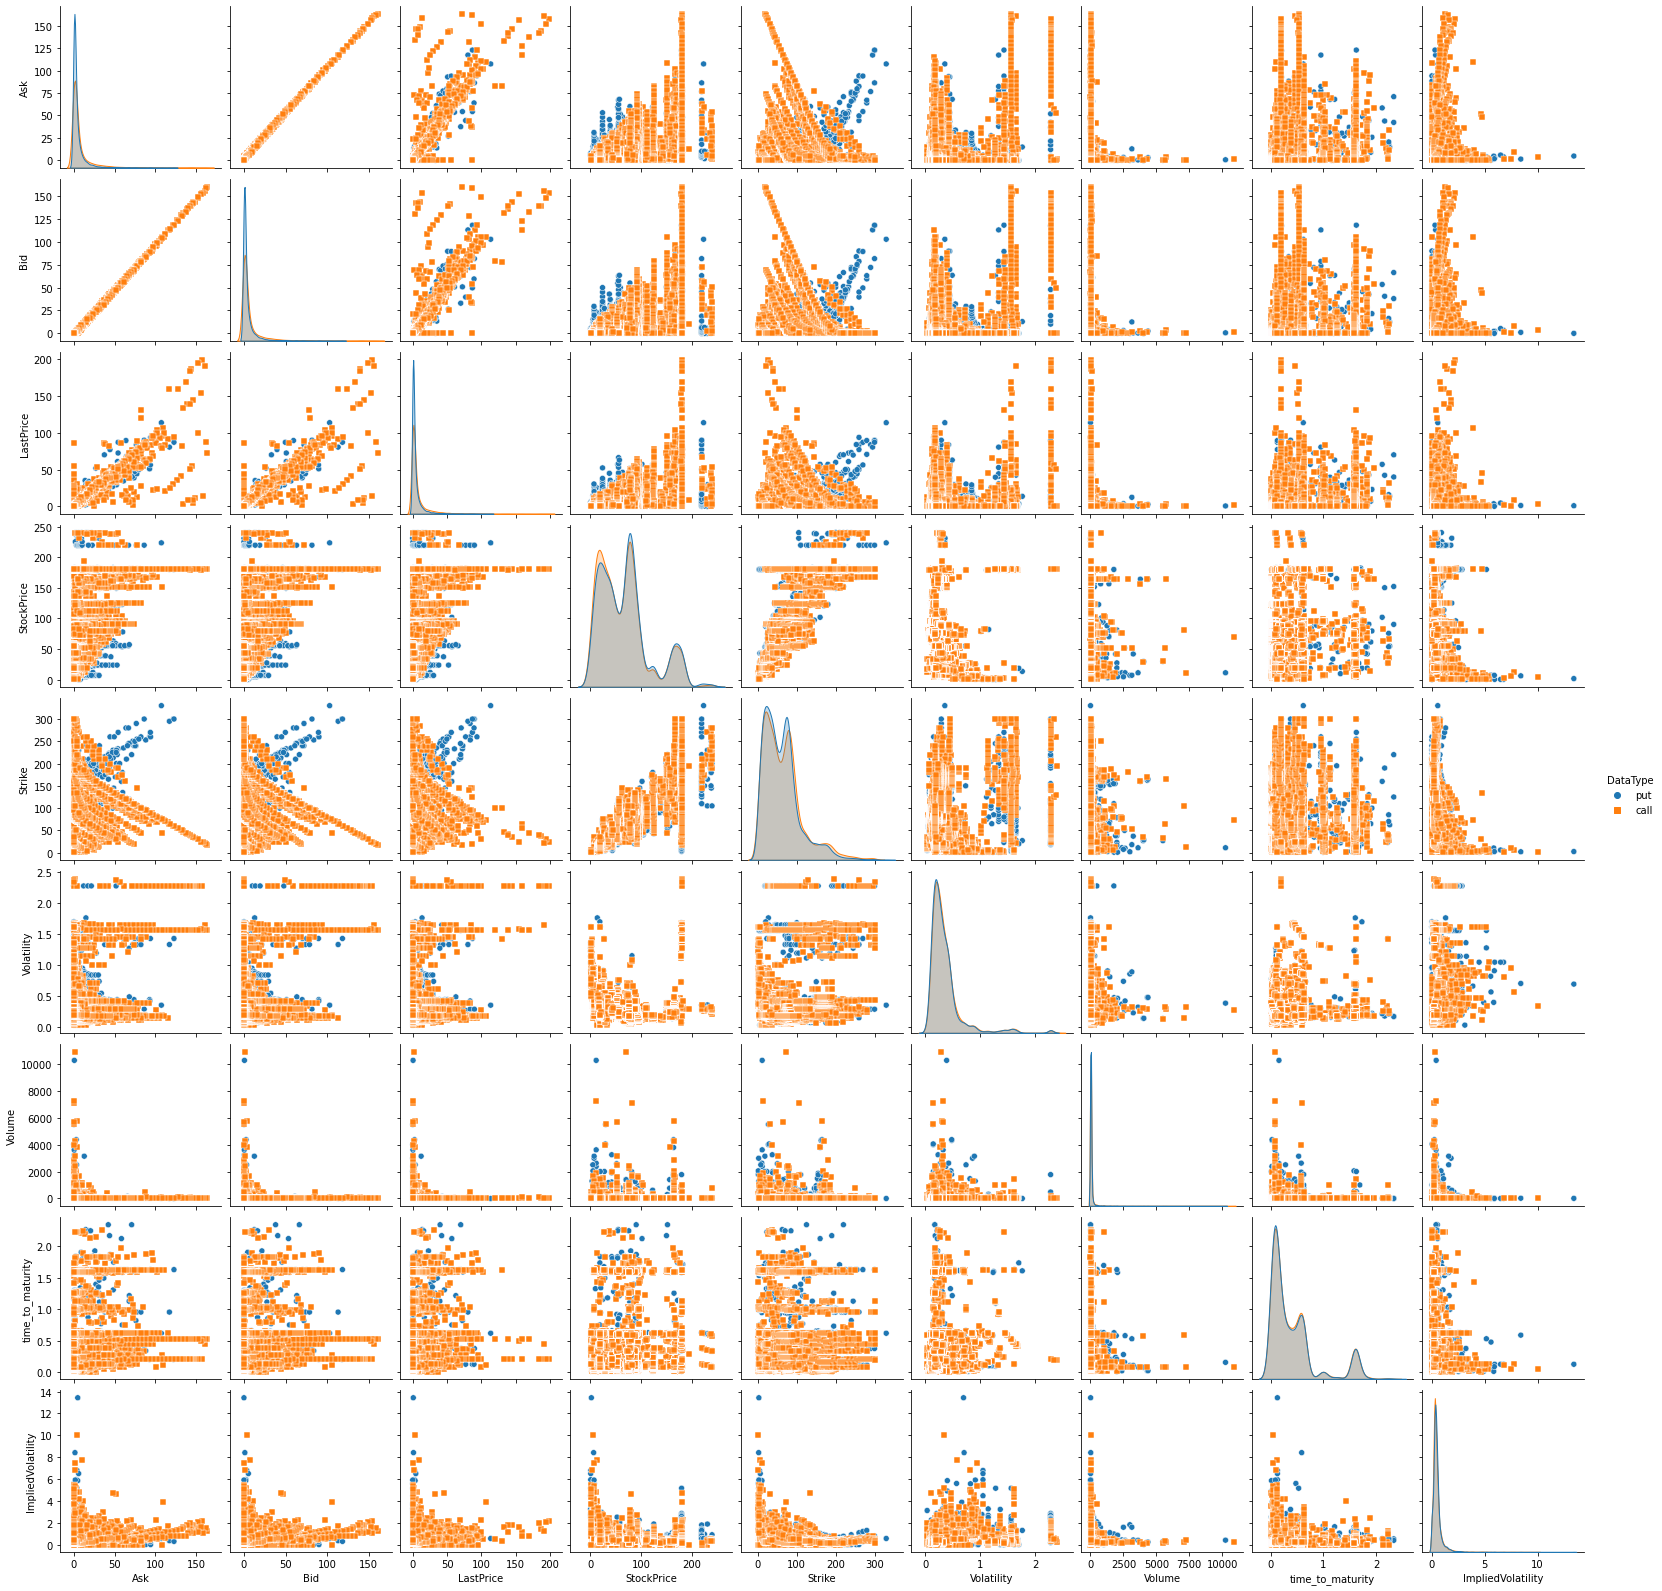

In [135]:
import seaborn as sns
h=sns.pairplot(Option_data,hue='DataType',markers=['o','s'])

# Dimension Reduction and Visualization

In [136]:
def doLabeling(data, threshold):
    label_put=[]
    label_call=[]
    put_data = data[data['DataType'] == 'put']
    call_data = data[data['DataType'] == 'call']

    OTM_p = put_data['StockPrice'] > put_data['Strike'] + threshold
    ITM_p = put_data['StockPrice'] + threshold < put_data['Strike'] 
    #ATM_p = put_data['StockPrice'] == put_data['Strike']
    NTM_p = abs(put_data['StockPrice'] - put_data['Strike']) <= threshold

    OTM_c = call_data['StockPrice'] + threshold < call_data['Strike']
    ITM_c = call_data['StockPrice'] > call_data['Strike'] + threshold
    #ATM_c = call_data['StockPrice'] == call_data['Strike']
    NTM_c = abs(call_data['StockPrice'] - call_data['Strike']) <= threshold

    label_put.append(OTM_p)
    label_put.append(ITM_p)
    label_call.append(OTM_c)
    label_call.append(ITM_c)
    #label_put.append(ATM_p)
    #label_call.append(ATM_c)
    label_put.append(NTM_p)
    label_call.append(NTM_c)

    label_name=['OTM', 'ITM', 'NTM']

    return label_put, label_call, label_name

In [137]:
def getPCA(df):
    normalized_data = StandardScaler().fit_transform(df)
    #normalized_data = MinMaxScaler().fit_transform(df)
    pca= PCA()
    return pca.fit_transform(normalized_data)
    
def getTSNE(df, perplexity):
    normalized_data = StandardScaler().fit_transform(df)
    tsne = TSNE(perplexity = perplexity, init = 'pca')
    return tsne.fit_transform(normalized_data)    

def getUMAP(df, n_neighbors, min_dist):
    normalized_data = StandardScaler().fit_transform(df)
    return umap.UMAP(n_neighbors = n_neighbors,
                       min_dist = min_dist,
                       metric = 'euclidean', 
                       init = 'random').fit_transform(normalized_data)


In [138]:
def biplot(newData, label, label_name, Method):

    marker_list=['p','o','d','s', '>']
    c_list=['royalblue','gold', 'red', 'y','deepblue']
    e_list=['k','orange', 'darkred', 'r', 'g']
    for i in range(len(label)):
            plt.scatter(newData[label[i], 0], newData[label[i], 1], label=label_name[i],
                    marker=marker_list[i], color=c_list[i], edgecolors=e_list[i],  s=35)
        

    plt.legend(prop={'size':10})

    if Method=='pca' or Method=='PCA':
        plt.xlabel('$PC_{1}$')
        plt.ylabel('$PC_{2}$')
    elif Method=='spca':
        plt.xlabel('$SPC_{1}$')
        plt.ylabel('$SPC_{2}$')
    else:
        plt.xlabel('$'+ Method +'_{1}'+'$')
        plt.ylabel('$'+ Method +'_{2}'+'$')
    #plt.title('NPOptions %s' % (Method))

    plt.grid('on')

In [139]:
option_label_put,option_label_call, option_label_name=doLabeling(Option_data, 0.5)

print('\nLabel for Put Option data')
print('OTM:', np.sum(option_label_put[0]), 'ITM:', np.sum(option_label_put[1]), 'NTM:', np.sum(option_label_put[2]))
print('\nLabel for Call Option data')
print('OTM:', np.sum(option_label_call[0]), 'ITM:', np.sum(option_label_call[1]), 'NTM:', np.sum(option_label_call[2]))


Label for Put Option data
OTM: 4451 ITM: 2230 NTM: 444

Label for Call Option data
OTM: 3699 ITM: 2958 NTM: 471


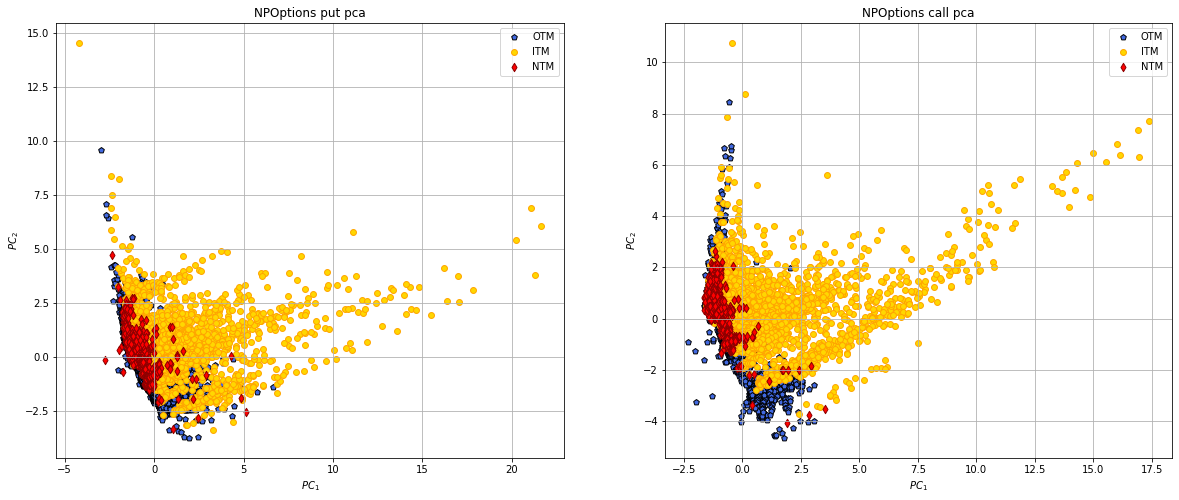

In [140]:
option_p=Option_data[Option_data['DataType'] == 'put'].iloc[:,1::]
option_pcaNewData_p=getPCA(option_p)
fig=plt.figure(figsize=(20,8))
fig.add_subplot(121)
plt.title('NPOptions put pca')
biplot(option_pcaNewData_p, option_label_put, option_label_name, 'pca')

option_c=Option_data[Option_data['DataType'] == 'call'].iloc[:,1::]
option_pcaNewData_c=getPCA(option_c)
#fig=plt.figure(figsize=(10,6))
fig.add_subplot(122)
plt.title('NPOptions call pca')
biplot(option_pcaNewData_c, option_label_call, option_label_name, 'pca')

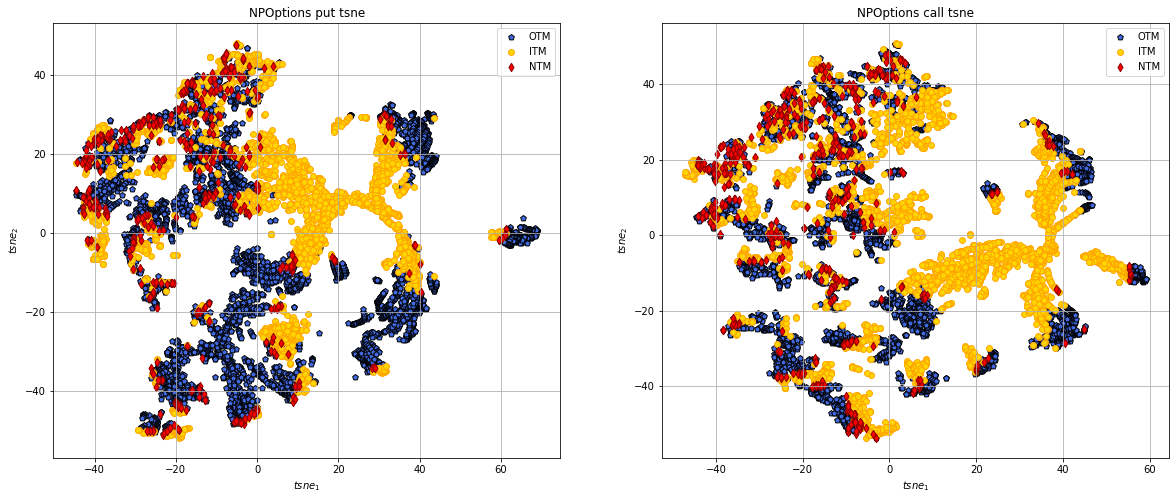

In [141]:
option_tsneNewData_p=getTSNE(option_p, 100)
fig=plt.figure(figsize=(20,8))
fig.add_subplot(121)
plt.title('NPOptions put tsne')
biplot(option_tsneNewData_p, option_label_put, option_label_name, 'tsne')

option_tsneNewData_c=getTSNE(option_c, 100)
#fig=plt.figure(figsize=(10,6))
fig.add_subplot(122)
plt.title('NPOptions call tsne')
biplot(option_tsneNewData_c, option_label_call, option_label_name, 'tsne')

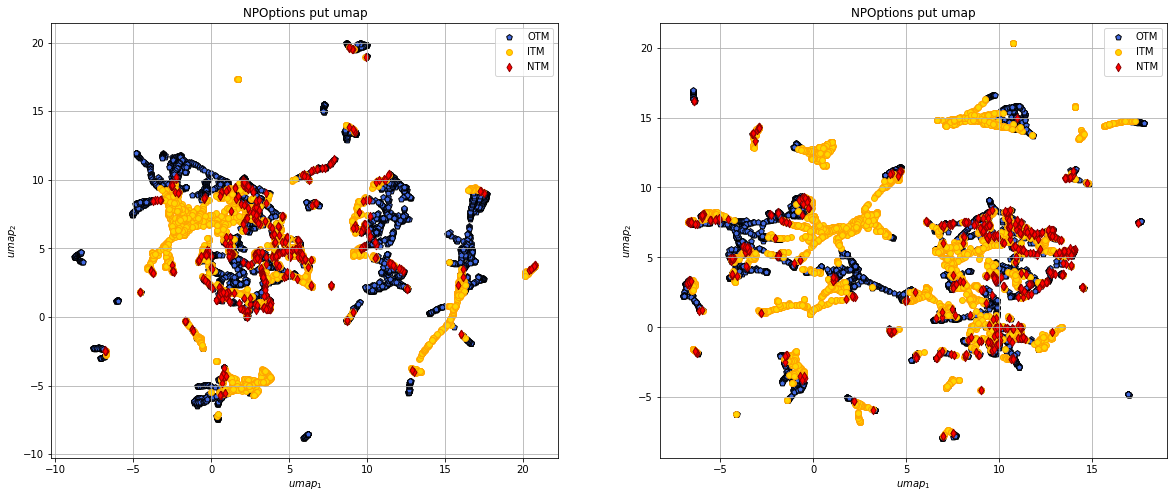

In [142]:
option_umapNewData_p=getUMAP(option_p,10, 0.1)
fig=plt.figure(figsize=(20,8))
fig.add_subplot(121)
plt.title('NPOptions put umap')
biplot(option_umapNewData_p, option_label_put, option_label_name, 'umap')

option_umapNewData_c=getUMAP(option_c,10, 0.1)
fig.add_subplot(122)
plt.title('NPOptions put umap')
biplot(option_umapNewData_c, option_label_call, option_label_name, 'umap')

# Machine Learning, Selective Learning, Adaptive Learning
# Split the Option data into OTM, ITM and NTM

In [143]:
def splitData(df, threshold):
    OTM, ITM, NTM = [],[],[]
    for index, row in df.iterrows():
        if row['DataType'] == 'put':
            if row['StockPrice'] > row['Strike'] + threshold:
                OTM.append(row.values)
            elif row['StockPrice'] < row['Strike'] - threshold:
                ITM.append(row.values)
            else:
                NTM.append(row.values)
        elif row['DataType'] == 'call':
            if row['StockPrice'] < row['Strike'] - threshold:
                OTM.append(row.values)
            elif row['StockPrice'] > row['Strike'] + threshold:
                ITM.append(row.values)
            else:
                NTM.append(row.values)   
    OTM_df = pd.DataFrame(data=OTM, columns=df.columns)
    ITM_df = pd.DataFrame(data=ITM, columns=df.columns)
    NTM_df = pd.DataFrame(data=NTM, columns=df.columns)
    return OTM_df,ITM_df,NTM_df


OTM_df, ITM_df, NTM_df = splitData(Option_data, 0.5)

In [144]:
OTM_df

,DataType,Ask,Bid,LastPrice,StockPrice,Strike,Volatility,Volume,time_to_maturity,ImpliedVolatility
0,put,0.10,0.0,0.11,79.40,30.0,0.284654,22,0.128767,1.242191
1,put,0.25,0.0,0.10,71.86,35.0,0.400073,61,0.090411,1.173832
2,put,1.80,0.0,0.40,79.40,40.0,0.284654,5,0.128767,1.442386
3,put,0.20,0.0,0.09,79.54,45.0,0.286563,4,0.123288,0.763674
4,put,0.15,0.0,0.10,72.10,50.0,0.396490,1,0.095890,0.578129
...,...,...,...,...,...,...,...,...,...,...
8145,call,0.10,0.0,0.05,19.26,25.0,0.198330,6,0.602740,0.233406
8146,call,0.30,0.2,0.20,21.20,30.0,0.247322,10,1.413699,0.435553
8147,call,0.15,0.0,0.05,19.74,35.0,0.200913,1,0.936986,0.461919
8148,call,0.35,0.0,0.35,1.86,2.5,0.502372,10,0.128767,1.765626


# Normalize data 


In [145]:

normalization_bit=1

if normalization_bit == 0:
    OTM_data_normalized=MinMaxScaler().fit_transform(OTM_df.iloc[:,1:])
    ITM_data_normalized=MinMaxScaler().fit_transform(ITM_df.iloc[:,1:])
    NTM_data_normalized=MinMaxScaler().fit_transform(NTM_df.iloc[:,1:])
else: 
    OTM_data_normalized=StandardScaler().fit_transform(OTM_df.iloc[:,1:])
    ITM_data_normalized=StandardScaler().fit_transform(ITM_df.iloc[:,1:])
    NTM_data_normalized=StandardScaler().fit_transform(NTM_df.iloc[:,1:])

otm_data=pd.DataFrame(data=OTM_data_normalized, columns=Option_data.iloc[:,1:].columns)
itm_data=pd.DataFrame(data=ITM_data_normalized, columns=Option_data.iloc[:,1:].columns)
ntm_data=pd.DataFrame(data=NTM_data_normalized, columns=Option_data.iloc[:,1:].columns)


OTM_data_normalized


array([[-0.50646043, -0.4703403 , -0.4665736 , ..., -0.12092957,
        -0.58658372,  1.9918284 ],
       [-0.43649674, -0.4703403 , -0.47103046, ...,  0.01266187,
        -0.6729119 ,  1.82084707],
       [ 0.2864614 , -0.4703403 , -0.33732467, ..., -0.17916174,
        -0.58658372,  2.49255942],
       ...,
       [-0.4831392 , -0.4703403 , -0.49331476, ..., -0.19286343,
         1.23247437,  0.04019291],
       [-0.38985428, -0.4703403 , -0.35960897, ..., -0.16203464,
        -0.58658372,  3.30105684],
       [-0.20328444, -0.4703403 , -0.35960897, ..., -0.18258717,
         0.53568263,  1.52285105]])

# Nearest Neighbors Search

In [146]:
from sklearn.neighbors import NearestNeighbors

def NNS(df, bad_guys,n_neighbors): 
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(df)
    distances, indices = nbrs.kneighbors(bad_guys)
    return removeDuplicates(indices)

def removeDuplicates(arr):
    merge = []
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if j > 0 and arr[i][j] not in merge:
                    merge.append(arr[i][j])
    return np.array(merge)


# Evaluate Learning Prediction


In [147]:
def evaluationPrediction(predictedRes, trueRes):
    Error=np.abs(predictedRes- trueRes)

    print('The mean error is ' + str(np.mean(Error)))
    Q3 = np.median(Error)
    print('The median error is ' + str(Q3))
    MSE=np.sum(Error**2)/len(Error)
    print('The MSE is {:20.16f}'.format(MSE))

    print('The maximum error is {:20.16f}'.format(max(Error)))
    print('The minimum error is {:20.16f}'.format(min(Error)))
    return MSE, Q3



## KNN

In [148]:
import time
from sklearn import neighbors
from sklearn import preprocessing
def doKNN(df, metric, adapt):
    (n,p)=df.shape
    X=df.iloc[:, 0:p-1]
    # response variable -->y 
    impliedVolatility=df["ImpliedVolatility"]

    # Split the data set into training data(80%) and testing data(20%)

    train_data, test_data, train_data_impliedVolatility, test_data_impliedVolatility = train_test_split(X, impliedVolatility, 
                                                    test_size=0.2, random_state=42)

    # Split the train data set into train_train data(80%) and train_test data(20%)
    train_train, train_test, train_train_impliedVolatility, train_test_impliedVolatility = train_test_split(train_data, train_data_impliedVolatility, 
                                                    test_size=0.2, random_state=42)
    
    neighbor_size=10
    kNN = neighbors.KNeighborsRegressor(n_neighbors=neighbor_size, weights='distance', metric=metric)
    kNN.fit(train_train.values, train_train_impliedVolatility)
    predicted_train_test = kNN.predict(train_test)

    # error of predicted and true implied volatility 

    error = abs(train_test_impliedVolatility - predicted_train_test)
    sort_errors = np.argsort(error)[::-1]
    badguys = sort_errors[:int(len(sort_errors)*0.1)]
    
    # Selective learning

    badneigh_train = NNS(train_train, train_test.iloc[badguys], 10)
    badneigh_test = NNS(test_data, train_test.iloc[badguys], 5)
    train_clean = train_data.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    train_data_impliedVolatility_clean = train_data_impliedVolatility.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    test_clean = test_data.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])
    test_data_impliedVolatility_clean = test_data_impliedVolatility.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])

    # Compare Result
    # Original ML result:
    kNN.fit(train_data.values, train_data_impliedVolatility)
    predicted_IV = kNN.predict(test_data)
    print("\nPredicted test data impliedVolatility")
    print(predicted_IV[:20])
    KNN_MSE, KNN_Q3 = evaluationPrediction(predicted_IV, test_data_impliedVolatility)

    # After Selective Learning
    kNN.fit(train_clean.values, train_data_impliedVolatility_clean)
    predicted_IV_clean = kNN.predict(test_clean)
    print("\nPredicted test data impliedVolatility after selective learning")
    print(predicted_IV_clean[:20])
    clean_KNN_MSE, clean_KNN_Q3 = evaluationPrediction(predicted_IV_clean, test_data_impliedVolatility_clean)

    # After Adaptive Learning
    if adapt == True:
        #badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 10)
        #train_clean_adaptive = train_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 100)
        train_clean_adaptive = train_clean.iloc[badneigh_train_clean]
        train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.iloc[badneigh_train_clean]
        #train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        kNN.fit(train_clean_adaptive.values, train_clean_impliedVolatility_clean)
        predicted_IV_clean_adaptive = kNN.predict(test_clean)
        print("\nPredicted test data impliedVolatility after adaptive learning")
        print(predicted_IV_clean_adaptive[:20])
        clean_KNN_MSE_adaptive,clean_KNN_Q3_adaptive = evaluationPrediction(predicted_IV_clean_adaptive, test_data_impliedVolatility_clean)

        return [KNN_MSE, clean_KNN_MSE, clean_KNN_MSE_adaptive], [KNN_Q3, clean_KNN_Q3, clean_KNN_Q3_adaptive]
    
    return [KNN_MSE, clean_KNN_MSE], [KNN_Q3, clean_KNN_Q3]
        

In [149]:
knn_otm_mse, knn_otm_q3= doKNN(otm_data,'euclidean',True)



Predicted test data impliedVolatility
[ 1.55587806e-04 -7.18474992e-02  5.90716736e-01 -2.25480402e-01
 -3.62242076e-01 -3.47851056e-01 -3.38623838e-01 -5.31646950e-01
 -4.90064486e-01 -4.27393273e-01 -4.86089508e-01 -5.30279130e-01
  4.63930493e-01 -3.49530889e-01 -5.26044254e-01 -2.81560514e-01
 -5.19144022e-01  2.41656473e-01 -8.37212412e-02  2.69475399e+00]
The mean error is 0.24387945903991606
The median error is 0.1163719675334432
The MSE is   0.3082101738874465
The maximum error is   9.2408659949147705
The minimum error is   0.0002091027758232

Predicted test data impliedVolatility after selective learning
[-0.27980382 -0.2350735  -0.34435107 -0.37620586 -0.49054496 -0.41308448
 -0.47600853 -0.52636455  0.46393049 -0.33359596 -0.57528357 -0.28733469
 -0.54364673 -0.08372124 -0.22956311 -0.12389034 -0.64469232 -0.19848052
 -0.29970443 -0.32918301]
The mean error is 0.2078096028799256
The median error is 0.10887562572552228
The MSE is   0.2389747790103498
The maximum error is   9

In [150]:
knn_itm_mse, knn_itm_q3 = doKNN(itm_data,'euclidean',True)


Predicted test data impliedVolatility
[-0.33706477 -0.37821137  1.30241218 -0.1408872  -0.51972724 -0.36043009
  0.10722956 -0.12854521 -0.58246341 -0.37726595 -0.38387984  0.13196207
 -0.28436504 -0.40947829 -0.39493679  1.75592103 -0.33563812 -0.52011326
 -0.57291497 -0.44907224]
The mean error is 0.3877197218887473
The median error is 0.1932197056178645
The MSE is   0.5688204568219225
The maximum error is   9.2615851004732086
The minimum error is   0.0000000000000001

Predicted test data impliedVolatility after selective learning
[-0.31773849  1.23033479 -0.51930378 -0.05976303 -0.58246341 -0.37726595
 -0.24002274 -0.28436504 -0.35103802 -0.41699594 -0.3343943  -0.48502172
 -0.52973881 -0.44173828 -0.40556584 -0.43827022 -0.09087414 -0.36528039
 -0.38899841 -0.23049221]
The mean error is 0.2888445211818904
The median error is 0.15556240990117118
The MSE is   0.2334587067394649
The maximum error is   4.7500388315513504
The minimum error is   0.0000000000000001

Predicted test data i

In [151]:
knn_ntm_mse, knn_ntm_q3 = doKNN(ntm_data,'euclidean',True)


Predicted test data impliedVolatility
[ 1.14347325  1.35730955 -0.34099084 -0.45694334  0.090888   -0.30061398
  0.30153241 -0.38533646  0.13942395 -0.38765396  0.30039722 -0.60759206
  0.22507232 -0.30064922 -0.74712183 -0.4031507  -0.5947103  -0.52956566
 -0.75468836 -0.57583288]
The mean error is 0.41823919552692135
The median error is 0.1653689128971128
The MSE is   0.9604014831101860
The maximum error is   9.4027365238364897
The minimum error is   0.0005371959814442

Predicted test data impliedVolatility after selective learning
[ 1.41573714 -0.31575483 -0.43124831  0.04900794  0.24394128 -0.23823165
  0.12911373  0.23235258 -0.67147206  0.24874263 -0.39840209 -0.54863065
 -0.82940052 -0.66003803 -0.55056538 -0.37213945 -0.48218489  0.15903781
 -0.34485711  0.05550869]
The mean error is 0.3399267661843393
The median error is 0.19462004149751377
The MSE is   0.4260620686687379
The maximum error is   3.9617143593265838
The minimum error is   0.0030606430366791

Predicted test data 

# SVM

In [152]:
from sklearn.svm import SVR
def doSVM(df, kernel, adapt):
    (n,p)=df.shape
    X=df.iloc[:, 0:p-1]
    # response variable -->y 
    impliedVolatility=df["ImpliedVolatility"]

    # Split the data set into training data(80%) and testing data(20%)

    train_data, test_data, train_data_impliedVolatility, test_data_impliedVolatility = train_test_split(X, impliedVolatility, 
                                                    test_size=0.2, random_state=42)

    # Split the train data set into train_train data(80%) and train_test data(20%)
    train_train, train_test, train_train_impliedVolatility, train_test_impliedVolatility = train_test_split(train_data, train_data_impliedVolatility, 
                                                    test_size=0.2, random_state=42)
    

    SVM = SVR(kernel = 'linear',C=1.0, epsilon=0.1)    
    SVM.fit(train_train.values, train_train_impliedVolatility)
    predicted_train_test = SVM.predict(train_test)

    # error of predicted and true implied volatility 

    error = abs(train_test_impliedVolatility - predicted_train_test)
    sort_errors = np.argsort(error)[::-1]
    badguys = sort_errors[:int(len(sort_errors)*0.1)]
    
    # Selective learning

    badneigh_train = NNS(train_train, train_test.iloc[badguys], 10)
    badneigh_test = NNS(test_data, train_test.iloc[badguys], 5)
    train_clean = train_data.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    train_data_impliedVolatility_clean = train_data_impliedVolatility.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    test_clean = test_data.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])
    test_data_impliedVolatility_clean = test_data_impliedVolatility.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])

    # Compare Result
    # Original ML result:
    SVM.fit(train_data.values, train_data_impliedVolatility)
    predicted_IV = SVM.predict(test_data)
    print("\nPredicted test data impliedVolatility")
    print(predicted_IV[:20])
    MSE, Q3 = evaluationPrediction(predicted_IV, test_data_impliedVolatility)

    # After Selective Learning
    SVM.fit(train_clean.values, train_data_impliedVolatility_clean)
    predicted_IV_clean = SVM.predict(test_clean)
    print("\nPredicted test data impliedVolatility after selective learning")
    print(predicted_IV_clean[:20])
    clean_MSE, clean_Q3 = evaluationPrediction(predicted_IV_clean, test_data_impliedVolatility_clean)

    # After Adaptive Learning
    if adapt == True:
        #badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 10)
        #train_clean_adaptive = train_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        #train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 100)
        train_clean_adaptive = train_clean.iloc[badneigh_train_clean]
        train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.iloc[badneigh_train_clean]
        SVM.fit(train_clean_adaptive.values, train_clean_impliedVolatility_clean)
        predicted_IV_clean_adaptive = SVM.predict(test_clean)
        print("\nPredicted test data impliedVolatility after adaptive learning")
        print(predicted_IV_clean_adaptive[:20])
        clean_MSE_adaptive, clean_Q3_adaptive = evaluationPrediction(predicted_IV_clean_adaptive, test_data_impliedVolatility_clean)

        return [MSE, clean_MSE, clean_MSE_adaptive], [Q3, clean_Q3, clean_Q3_adaptive]
    
    return [MSE, clean_MSE], [Q3, clean_Q3]

In [153]:
svm_otm_mse, svm_otm_q3 = doSVM(otm_data,'linear', True)


Predicted test data impliedVolatility
[-0.15471936 -0.1691405   0.25447579 -0.20085243  0.29182752 -0.30029028
 -0.14817263 -0.87946319 -0.22136554 -0.13483369 -0.39468825 -0.4787465
 -0.12718444 -0.26484676 -0.4302839  -0.35303702 -0.27897168 -0.0039408
 -0.12863516  0.4065025 ]
The mean error is 0.3976188463643244
The median error is 0.198687838734583
The MSE is   0.7779517298316492
The maximum error is  16.6090990532998042
The minimum error is   0.0004102737187456

Predicted test data impliedVolatility after selective learning
[-0.15547097 -0.17203797 -0.20762662 -0.30514765 -0.14884981 -0.88854085
 -0.21956932 -0.13636674 -0.39297329 -0.47924496 -0.27007608 -0.42850599
 -0.35245204 -0.27742808 -0.13693661 -0.17603992  0.43781441 -0.24420932
 -0.74041905 -0.41020099]
The mean error is 0.3066831369031677
The median error is 0.181885818339118
The MSE is   0.5114321978926731
The maximum error is  16.6264439482569806
The minimum error is   0.0011360035787799

Predicted test data implie

In [154]:
svm_itm_mse, svm_itm_q3 = doSVM(itm_data,'linear', True)


Predicted test data impliedVolatility
[ 0.02943697  0.13744313  0.15348776 -0.08138153 -0.39418832 -0.5906316
 -0.25140452 -0.05158113 -0.39375668 -0.13556416 -0.7043676   0.37772967
 -0.15166031 -0.27063933 -0.22950212  0.2368412  -0.16222055 -0.3105393
 -0.62786545 -0.28711349]
The mean error is 0.48107093509098015
The median error is 0.25004140570947025
The MSE is   0.8563192621745508
The maximum error is  10.2206482418816815
The minimum error is   0.0000997926597889

Predicted test data impliedVolatility after selective learning
[ 0.15143239 -0.39272985 -0.24703153 -0.06553465 -0.3986135  -0.13806752
  0.35781017 -0.15783416 -0.2903294  -0.23502383 -0.17755634 -0.30654133
 -0.59989069 -0.28502017  0.20083257 -0.37104167 -0.23119133 -0.10109876
 -0.36760141 -0.27986683]
The mean error is 0.3374220684428957
The median error is 0.21027808882981341
The MSE is   0.2452454242298892
The maximum error is   2.4676521428661609
The minimum error is   0.0003753145826115

Predicted test data i

In [155]:
svm_ntm_mse, svm_ntm_q3 = doSVM(ntm_data,'linear', True)


Predicted test data impliedVolatility
[ 0.83465519  0.75668762 -0.07380069 -0.07645674  0.09364041 -0.43920138
  0.14609124 -0.15982813  0.22077624  0.48356197  0.19374672 -0.23719064
  0.1418085  -0.1387535   0.88019653 -0.37210238 -0.37851464 -0.7793357
 -0.70556692 -0.33360074]
The mean error is 0.5094717243258777
The median error is 0.2749283359514808
The MSE is   1.1506010688348296
The maximum error is  10.3987346095534381
The minimum error is   0.0008819304460277

Predicted test data impliedVolatility after selective learning
[ 0.72211256 -0.06465313 -0.06077235  0.08652885 -0.43791262  0.14634897
 -0.16091235  0.21473916  0.48467022  0.18738073 -0.2200126   0.1366939
 -0.36468901 -0.74923356 -0.68629991 -0.31665451 -0.12934239  0.03638386
 -0.7265811   0.03216618]
The mean error is 0.3786216773788647
The median error is 0.2029501099198557
The MSE is   0.4550425379119035
The maximum error is   3.8437638061055708
The minimum error is   0.0042809315672735

Predicted test data impl

# Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor
def doRF(df, adapt):
    (n,p)=df.shape
    X=df.iloc[:, 0:p-1]
    # response variable -->y 
    impliedVolatility=df["ImpliedVolatility"]

    # Split the data set into training data(80%) and testing data(20%)

    train_data, test_data, train_data_impliedVolatility, test_data_impliedVolatility = train_test_split(X, impliedVolatility, 
                                                    test_size=0.2, random_state=42)

    # Split the train data set into train_train data(80%) and train_test data(20%)
    train_train, train_test, train_train_impliedVolatility, train_test_impliedVolatility = train_test_split(train_data, train_data_impliedVolatility, 
                                                    test_size=0.2, random_state=42)
    

    params = {'n_estimators': 50, 
          'max_depth':8,
          'min_samples_split': 2}

    RF = RandomForestRegressor(**params)
    RF.fit(train_train.values, train_train_impliedVolatility)
    predicted_train_test = RF.predict(train_test)

    # error of predicted and true implied volatility 

    error = abs(train_test_impliedVolatility - predicted_train_test)
    sort_errors = np.argsort(error)[::-1]
    badguys = sort_errors[:int(len(sort_errors)*0.1)]
    
    # Selective learning

    badneigh_train = NNS(train_train, train_test.iloc[badguys], 10)
    badneigh_test = NNS(test_data, train_test.iloc[badguys], 5)
    train_clean = train_data.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    train_data_impliedVolatility_clean = train_data_impliedVolatility.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    test_clean = test_data.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])
    test_data_impliedVolatility_clean = test_data_impliedVolatility.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])

    # Compare Result
    # Original ML result:
    RF.fit(train_data.values, train_data_impliedVolatility)
    predicted_IV = RF.predict(test_data)
    print("\nPredicted test data impliedVolatility")
    print(predicted_IV[:20])
    MSE, Q3 = evaluationPrediction(predicted_IV, test_data_impliedVolatility)

    # After Selective Learning
    RF.fit(train_clean.values, train_data_impliedVolatility_clean)
    predicted_IV_clean = RF.predict(test_clean)
    print("\nPredicted test data impliedVolatility after selective learning")
    print(predicted_IV_clean[:20])
    clean_MSE, clean_Q3 = evaluationPrediction(predicted_IV_clean, test_data_impliedVolatility_clean)

    # After Adaptive Learning
    if adapt == True:
        #badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 10)
        #train_clean_adaptive = train_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        #train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 100)
        train_clean_adaptive = train_clean.iloc[badneigh_train_clean]
        train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.iloc[badneigh_train_clean]

        RF.fit(train_clean_adaptive.values, train_clean_impliedVolatility_clean)
        predicted_IV_clean_adaptive = RF.predict(test_clean)
        print("\nPredicted test data impliedVolatility after adaptive learning")
        print(predicted_IV_clean_adaptive[:20])
        clean_MSE_adaptive, clean_Q3_adaptive= evaluationPrediction(predicted_IV_clean_adaptive, test_data_impliedVolatility_clean)

        return [MSE, clean_MSE, clean_MSE_adaptive],[Q3, clean_Q3, clean_Q3_adaptive]
    
    return [MSE, clean_MSE],[Q3, clean_Q3]

In [157]:
rf_otm_mse, rf_otm_q3 = doRF(otm_data,True)


Predicted test data impliedVolatility
[-0.11801982 -0.27305669  1.98280519 -0.17754405 -0.12504325 -0.30667002
 -0.35308722 -0.29447342 -0.50769119 -0.24646763 -0.5075028  -0.55739739
  0.34939344 -0.56353401 -0.51818158 -0.45800482 -0.56272279  0.41692215
 -0.18303869  1.06993245]
The mean error is 0.260228740078655
The median error is 0.13995387767749634
The MSE is   0.2878548919490119
The maximum error is   9.8760276574913739
The minimum error is   0.0000065913740189

Predicted test data impliedVolatility after selective learning
[-0.19566941 -0.18901934 -0.12450344 -0.30626407 -0.34816757 -0.49543838
 -0.26874757 -0.49505664 -0.56595787 -0.56931352 -0.44735774 -0.57634329
 -0.16139696  0.95287412 -0.2511435  -0.57817189 -0.15714319 -0.29185272
 -0.12734724 -0.570634  ]
The mean error is 0.22946893695548287
The median error is 0.12661914930860763
The MSE is   0.2540257843133188
The maximum error is   9.8149336585781910
The minimum error is   0.0000259895765078

Predicted test data 

In [158]:
rf_itm_mse, rf_itm_q3 = doRF(itm_data,True)


Predicted test data impliedVolatility
[ 0.33111538 -0.21952329  1.29184331 -0.13444544 -0.35875867 -0.35574776
 -0.24143382 -0.18014125 -0.38891183 -0.12233914 -0.29936966  0.24143193
 -0.12892276 -0.21564345 -0.2938175   3.68773447 -0.22113942 -0.42310642
 -0.26884945 -0.42261046]
The mean error is 0.393211057601076
The median error is 0.20127116025559935
The MSE is   0.5798066468005610
The maximum error is   9.2750364235434972
The minimum error is   0.0003666485550584

Predicted test data impliedVolatility after selective learning
[-0.2040163   1.79711626 -0.36965657 -0.21980855 -0.40556573 -0.10250056
  0.40301677 -0.14315728 -0.21262684 -0.29443522  3.99660502 -0.2164491
 -0.39776564 -0.27983566 -0.4041867  -0.05467758 -0.38034524 -0.04033573
 -0.18656119 -0.05834535]
The mean error is 0.33846659917854555
The median error is 0.18347359231962262
The MSE is   0.4510818634896057
The maximum error is   8.0574142410660468
The minimum error is   0.0000667846888218

Predicted test data i

In [159]:
rf_ntm_mse, rf_ntm_q3 = doRF(ntm_data,True)


Predicted test data impliedVolatility
[ 1.55724151  2.77475561 -0.29991337 -0.45770587  0.2588812  -0.41840773
  0.11826687 -0.66208214  0.16651772 -0.32850967  0.28017076 -0.3147178
  0.09025449  0.01590903 -0.79294864 -0.44088673 -0.50623115 -0.59836376
 -0.79946915 -0.34465683]
The mean error is 0.3745694460526515
The median error is 0.14762311810263723
The MSE is   0.6317811845582153
The maximum error is   6.5991498161757765
The minimum error is   0.0012360307584031

Predicted test data impliedVolatility after selective learning
[ 2.62602969 -0.44257774 -0.45113121  0.28119288 -0.42363139  0.0319069
 -0.64682258  0.11959998  0.31216086 -0.41226542  0.05244842 -0.42228894
 -0.57610762 -0.77306155 -0.47118027 -0.65948494 -0.44368175  0.08247059
 -0.32698588  0.08673359]
The mean error is 0.2961847592080019
The median error is 0.1396225412574136
The MSE is   0.4019445768650596
The maximum error is   3.8606926718042076
The minimum error is   0.0019410189600869

Predicted test data imp

# Gradient Boosting

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
def doGB(df, adapt):
    (n,p)=df.shape
    X=df.iloc[:, 0:p-1]
    # response variable -->y 
    impliedVolatility=df["ImpliedVolatility"]

    # Split the data set into training data(80%) and testing data(20%)

    train_data, test_data, train_data_impliedVolatility, test_data_impliedVolatility = train_test_split(X, impliedVolatility, 
                                                    test_size=0.2, random_state=42)

    # Split the train data set into train_train data(80%) and train_test data(20%)
    train_train, train_test, train_train_impliedVolatility, train_test_impliedVolatility = train_test_split(train_data, train_data_impliedVolatility, 
                                                    test_size=0.2, random_state=42)
    
    GB = GradientBoostingRegressor(random_state=0)
    GB.fit(train_train.values, train_train_impliedVolatility)
    predicted_train_test = GB.predict(train_test)

    # error of predicted and true implied volatility 

    error = abs(train_test_impliedVolatility - predicted_train_test)
    sort_errors = np.argsort(error)[::-1]
    badguys = sort_errors[:int(len(sort_errors)*0.1)]
    
    # Selective learning

    badneigh_train = NNS(train_train, train_test.iloc[badguys], 10)
    badneigh_test = NNS(test_data, train_test.iloc[badguys], 5)
    train_clean = train_data.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    train_data_impliedVolatility_clean = train_data_impliedVolatility.drop(train_data.index[np.concatenate((badneigh_train, badguys.values))])
    test_clean = test_data.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])
    test_data_impliedVolatility_clean = test_data_impliedVolatility.drop(test_data.index[np.concatenate((badneigh_test, badguys.values))])

    # Compare Result
    # Original ML result:
    GB.fit(train_data.values, train_data_impliedVolatility)
    predicted_IV = GB.predict(test_data)
    print("\nPredicted test data impliedVolatility")
    print(predicted_IV[:20])
    MSE, Q3 = evaluationPrediction(predicted_IV, test_data_impliedVolatility)

    # After Selective Learning
    GB.fit(train_clean.values, train_data_impliedVolatility_clean)
    predicted_IV_clean = GB.predict(test_clean)
    print("\nPredicted test data impliedVolatility after selective learning")
    print(predicted_IV_clean[:20])
    clean_MSE, clean_Q3 = evaluationPrediction(predicted_IV_clean, test_data_impliedVolatility_clean)

    # After Adaptive Learning
    if adapt == True:
        #badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 10)
        #train_clean_adaptive = train_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])
        #train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.drop(train_clean.index[np.concatenate((badneigh_train_clean, badneigh_test))])

        badneigh_train_clean = NNS(train_clean, test_data.iloc[badneigh_test], 100)
        train_clean_adaptive = train_clean.iloc[badneigh_train_clean]
        train_clean_impliedVolatility_clean = train_data_impliedVolatility_clean.iloc[badneigh_train_clean]

        GB.fit(train_clean_adaptive.values, train_clean_impliedVolatility_clean)
        predicted_IV_clean_adaptive = GB.predict(test_clean)
        print("\nPredicted test data impliedVolatility after adaptive learning")
        print(predicted_IV_clean_adaptive[:20])
        clean_MSE_adaptive, clean_Q3_adaptive = evaluationPrediction(predicted_IV_clean_adaptive, test_data_impliedVolatility_clean)

        return [MSE, clean_MSE, clean_MSE_adaptive],[Q3, clean_Q3, clean_Q3_adaptive]
    
    return [MSE, clean_MSE],[Q3, clean_Q3]

In [161]:
gb_otm_mse, gb_otm_q3 = doGB(otm_data,True)


Predicted test data impliedVolatility
[ 0.19228398 -0.35161796  0.73209608 -0.22556142 -0.19606698 -0.39967005
 -0.25087198 -0.32281005 -0.48165931 -0.21487587 -0.56841367 -0.50651952
  0.3574165  -0.34582104 -0.50902594 -0.31799065 -0.4695302   0.35216486
 -0.16249691  1.46948482]
The mean error is 0.2672358564194169
The median error is 0.14726790017547542
The MSE is   0.2797222779320024
The maximum error is   8.7676111378062327
The minimum error is   0.0001835275128305

Predicted test data impliedVolatility after selective learning
[-0.16390469 -0.21640214 -0.26606943 -0.19766233 -0.58147071 -0.52128793
 -0.41295632 -0.37554821 -0.46485344 -0.42878076 -0.27626527 -0.55879114
 -0.24202811 -0.3456892  -0.14982206 -0.49634969 -0.24867901 -0.0279678
 -0.25665333 -0.4479638 ]
The mean error is 0.23757594050835953
The median error is 0.13888055392231724
The MSE is   0.2351873326629268
The maximum error is   8.6082526133130521
The minimum error is   0.0001342487711083

Predicted test data 

In [162]:
gb_itm_mse, gb_itm_q3 = doGB(itm_data,True)


Predicted test data impliedVolatility
[ 0.76202403 -0.32090957  1.75105053 -0.17443368 -0.47613601 -0.29329341
  0.00771894 -0.15627909 -0.45473194 -0.14704591 -0.4447944   0.53139153
 -0.15131534 -0.30442554 -0.40579351  4.94806485 -0.28428155 -0.4370619
 -0.42153883 -0.4378883 ]
The mean error is 0.3824243779127946
The median error is 0.1900457274232874
The MSE is   0.5997805483350438
The maximum error is   9.9288049604147943
The minimum error is   0.0004519453499565

Predicted test data impliedVolatility after selective learning
[-0.33652625  1.7735462  -0.52428983  0.11323636 -0.45835308 -0.14754025
  0.57917793 -0.20751009 -0.30175086 -0.38041351 -0.2852744  -0.47398152
 -0.32569153 -0.45001252  0.23115918 -0.48167077 -0.2863671  -0.09857662
 -0.0385682  -0.27878696]
The mean error is 0.29299838238564346
The median error is 0.16726466200796916
The MSE is   0.2746291170070551
The maximum error is   7.1016312779509203
The minimum error is   0.0016833684431345

Predicted test data i

In [163]:
gb_ntm_mse, gb_ntm_q3 = doGB(ntm_data,True)


Predicted test data impliedVolatility
[ 2.31054966  3.12291001 -0.27806653 -0.23246866  0.23278644 -0.42886551
 -0.19794885 -0.55565594  0.18003485 -0.30209355  0.46254112 -0.4849654
 -0.1407014  -0.03931589 -0.77807171 -0.42083045 -0.53725719 -0.54280993
 -0.80692261 -0.4942941 ]
The mean error is 0.34119511027518806
The median error is 0.14905047307778563
The MSE is   0.5159717942184294
The maximum error is   5.8712253736707707
The minimum error is   0.0049630556679247

Predicted test data impliedVolatility after selective learning
[ 3.14098731e+00 -3.51522772e-01 -2.83553488e-01  1.68786543e-01
 -4.59752668e-01  1.84111188e-01  3.84935002e-01 -5.18614940e-01
  3.62919207e-02  9.09967048e-04 -3.88360879e-01 -4.94958534e-01
 -7.56536849e-01 -4.28332464e-01 -5.31555038e-01 -3.85597239e-01
 -1.04574172e-01 -3.27316728e-01  1.90781241e-01 -2.10712042e-01]
The mean error is 0.29434197040870114
The median error is 0.1648006838156909
The MSE is   0.3501134229185496
The maximum error is   3

# Visualize MSE

In [164]:
otm_mse_data = [knn_otm_mse, svm_otm_mse, rf_otm_mse, gb_otm_mse]
itm_mse_data = [knn_itm_mse, svm_itm_mse, rf_itm_mse, gb_itm_mse]
ntm_mse_data = [knn_ntm_mse, svm_ntm_mse, rf_ntm_mse, gb_ntm_mse]
otm_q3_data = [knn_otm_q3, svm_otm_q3, rf_otm_q3, gb_otm_q3]
itm_q3_data = [knn_itm_q3, svm_itm_q3, rf_itm_q3, gb_itm_q3]
ntm_q3_data = [knn_ntm_q3, svm_ntm_q3, rf_ntm_q3, gb_ntm_q3]

In [165]:
def plotMSE(data, type, axes):
    barWidth = 0.2   
    data_t = np.transpose(data)

    # Set position of bar on X axis 
    br1 = np.arange(4) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    
    # Make the plot 
    axes.bar(br1, data_t[0], color ='orangered', width = barWidth, 
            edgecolor ='grey', label ='MSE',zorder=2) 
    axes.bar(br2, data_t[1], color ='gold', width = barWidth, 
            edgecolor ='grey', label ='SL_MSE',zorder=2) 
    axes.bar(br3, data_t[2], color ='slateblue', width = barWidth, 
            edgecolor ='grey', label ='AL_MSE', zorder=2) 
    
    # Adding Xticks  
    plt.ylabel('MSE', fontweight ='bold') 
    plt.xticks([r + barWidth for r in range(4)], 
            ['kNN', 'SVM', 'RF', 'GB']) 
    axes.set_ylim([0,1.4])
    axes.set_title(type)
    axes.legend()
    plt.grid('on',zorder=0)



In [166]:
def plotQ3(data, type, axes):
    barWidth = 0.2   
    data_t = np.transpose(data)

    # Set position of bar on X axis 
    br1 = np.arange(4) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    
    # Make the plot 
    axes.bar(br1, data_t[0], color ='darkviolet', width = barWidth, 
            edgecolor ='grey', label ='Q3',zorder=2) 
    axes.bar(br2, data_t[1], color ='orange', width = barWidth, 
            edgecolor ='grey', label ='SL_Q3',zorder=2) 
    axes.bar(br3, data_t[2], color ='royalblue', width = barWidth, 
            edgecolor ='grey', label ='AL_Q3',zorder=2) 
    
    # Adding Xticks  
    plt.ylabel('MSE', fontweight ='bold') 
    plt.xticks([r + barWidth for r in range(4)], 
            ['kNN', 'SVM', 'RF', 'GB']) 
    axes.set_ylim([0,0.4])
    axes.set_title(type)
    axes.legend()
    plt.grid('on',zorder=0)


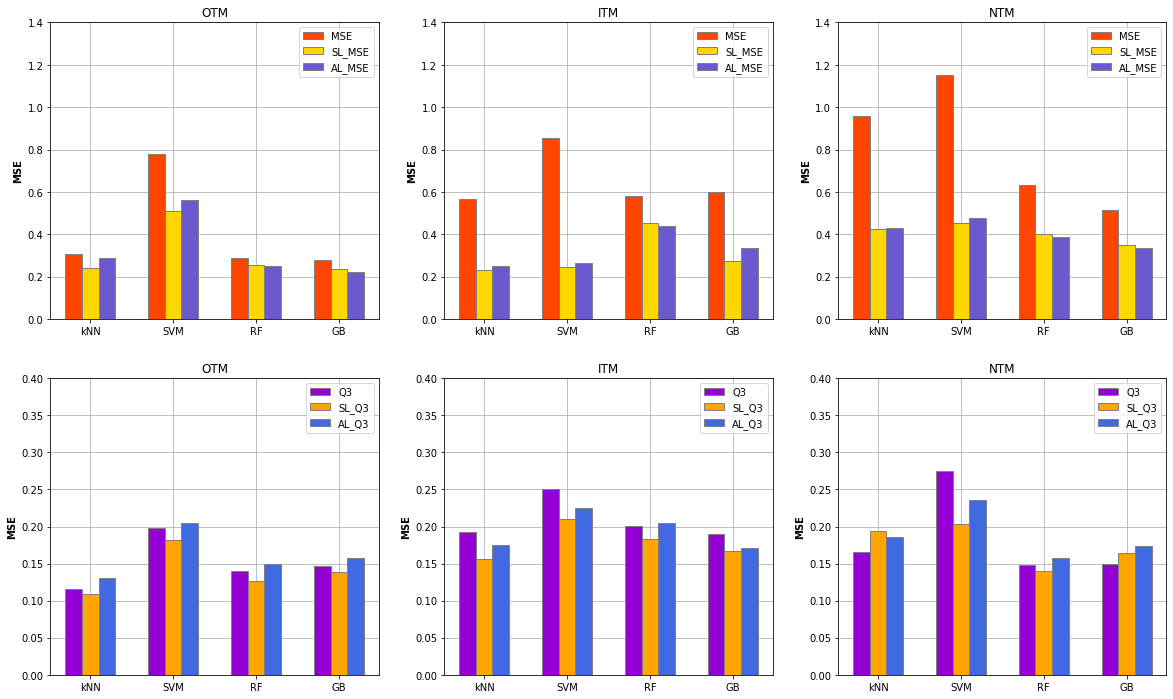

In [167]:
fig = plt.figure(figsize=(20, 12))
a = fig.add_subplot(231)
plotMSE(otm_mse_data, 'OTM',a) 
b = fig.add_subplot(232)
plotMSE(itm_mse_data, 'ITM',b) 
c = fig.add_subplot(233)
plotMSE(ntm_mse_data, 'NTM',c) 

d = fig.add_subplot(234)
plotQ3(otm_q3_data, 'OTM',d) 
e = fig.add_subplot(235)
plotQ3(itm_q3_data, 'ITM',e) 
f = fig.add_subplot(236)
plotQ3(ntm_q3_data, 'NTM',f) 


# Own option

In [168]:
aapl_otm = aapl_data[aapl_data['inTheMoney']==False]
aapl_itm = aapl_data[aapl_data['inTheMoney']==True]
aapl_otm

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney
36,123.0,1.29,1.29,1.30,0.780000,152.941180,72728.0,19902.0,0.277839,False
37,124.0,0.91,0.89,0.90,0.560000,160.000030,37017.0,18974.0,0.280281,False
38,125.0,0.64,0.61,0.62,0.390000,156.000000,68971.0,35524.0,0.287117,False
39,126.0,0.44,0.42,0.43,0.250000,131.578950,13672.0,15118.0,0.296882,False
40,127.0,0.30,0.29,0.30,0.160000,114.285720,7386.0,7191.0,0.308112,False
...,...,...,...,...,...,...,...,...,...,...
13,100.0,13.12,13.00,13.45,-0.430000,-3.173434,3.0,5162.0,0.360388,False
14,105.0,15.35,15.15,15.70,0.020000,0.130466,1.0,1196.0,0.358893,False
15,110.0,17.83,17.55,18.15,-0.370001,-2.032972,1.0,4363.0,0.357856,False
16,115.0,20.36,20.20,20.80,-0.309999,-1.499756,12.0,936.0,0.357276,False


In [169]:
aapl_otm_normalized=StandardScaler().fit_transform(aapl_otm) 
aapl_itm_normalized=StandardScaler().fit_transform(aapl_itm) 

aapl_o=pd.DataFrame(data=aapl_otm_normalized, columns=aapl_data.columns)
aapl_i=pd.DataFrame(data=aapl_itm_normalized, columns=aapl_data.columns)
aapl_o = aapl_o.drop(['inTheMoney'],1)
aapl_i = aapl_i.drop(['inTheMoney'],1)

In [170]:
aapl_o

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility
0,-0.484009,-0.362906,-0.553184,-0.554649,-0.201300,0.184590,20.403361,1.071480,-0.348976
1,-0.478845,-0.364501,-0.557231,-0.558638,-0.202293,0.202758,10.294153,1.001558,-0.347520
2,-0.473681,-0.365634,-0.560064,-0.561430,-0.203060,0.192463,19.339815,2.248546,-0.343441
3,-0.468518,-0.366473,-0.561986,-0.563325,-0.203692,0.129610,3.685560,0.711021,-0.337615
4,-0.463354,-0.367060,-0.563301,-0.564621,-0.204098,0.085103,1.906095,0.113748,-0.330914
...,...,...,...,...,...,...,...,...,...
1509,-0.602773,-0.313267,-0.434713,-0.433483,-0.206760,-0.217203,-0.183913,-0.039130,-0.299724
1510,-0.576955,-0.303909,-0.412961,-0.411044,-0.204730,-0.208700,-0.184479,-0.337955,-0.300616
1511,-0.551137,-0.293503,-0.388680,-0.386612,-0.206490,-0.214268,-0.184479,-0.099332,-0.301235
1512,-0.525318,-0.282887,-0.361870,-0.360185,-0.206219,-0.212896,-0.181365,-0.357546,-0.301581


In [171]:
aapl_o =aapl_o.rename(columns={"impliedVolatility": "ImpliedVolatility"})
aapl_o = aapl_o.fillna(0)
aapl_i =aapl_i.rename(columns={"impliedVolatility": "ImpliedVolatility"})
aapl_i = aapl_i.fillna(0)
aapl_o

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,ImpliedVolatility
0,-0.484009,-0.362906,-0.553184,-0.554649,-0.201300,0.184590,20.403361,1.071480,-0.348976
1,-0.478845,-0.364501,-0.557231,-0.558638,-0.202293,0.202758,10.294153,1.001558,-0.347520
2,-0.473681,-0.365634,-0.560064,-0.561430,-0.203060,0.192463,19.339815,2.248546,-0.343441
3,-0.468518,-0.366473,-0.561986,-0.563325,-0.203692,0.129610,3.685560,0.711021,-0.337615
4,-0.463354,-0.367060,-0.563301,-0.564621,-0.204098,0.085103,1.906095,0.113748,-0.330914
...,...,...,...,...,...,...,...,...,...
1509,-0.602773,-0.313267,-0.434713,-0.433483,-0.206760,-0.217203,-0.183913,-0.039130,-0.299724
1510,-0.576955,-0.303909,-0.412961,-0.411044,-0.204730,-0.208700,-0.184479,-0.337955,-0.300616
1511,-0.551137,-0.293503,-0.388680,-0.386612,-0.206490,-0.214268,-0.184479,-0.099332,-0.301235
1512,-0.525318,-0.282887,-0.361870,-0.360185,-0.206219,-0.212896,-0.181365,-0.357546,-0.301581


In [172]:
aaplo_knn_mse, aaplo_knn_q3 = doKNN(aapl_o,'euclidean',True)


Predicted test data impliedVolatility
[-0.31552691  3.50639218 -0.29517607 -0.15317664 -0.51474895 -0.28923321
 -0.25009712 -0.14193783 -0.29420283 -0.51474895 -0.29802452 -0.2794493
 -0.31415532 -0.51474895 -0.08731061 -0.51474895 -0.51474895 -0.51474895
 -0.29645664 -0.24729863]
The mean error is 0.16363674641127363
The median error is 0.015919859921862456
The MSE is   0.4674242286614622
The maximum error is   7.9124089620227496
The minimum error is   0.0000000000000000

Predicted test data impliedVolatility after selective learning
[-0.31552691 -0.29536654 -0.15304091 -0.51474895 -0.28921845 -0.231595
 -0.13614056 -0.29423798 -0.51474895 -0.29838538 -0.28058441 -0.31415532
 -0.51474895 -0.08295485 -0.51474895 -0.51474895 -0.29645664 -0.24453487
 -0.08002251 -0.28578614]
The mean error is 0.06974156460486784
The median error is 0.00878937675692848
The MSE is   0.0822622293431940
The maximum error is   3.8571722064722525
The minimum error is   0.0000000000000000

Predicted test data 

In [173]:
aapli_knn_mse, aapli_knn_q3 = doKNN(aapl_i,'euclidean',True)


Predicted test data impliedVolatility
[ 0.01821956  0.15695318  0.32825013 -0.93489023  0.61264002  1.22907972
 -0.93489023  1.11262021 -0.24027945 -0.4927134   0.50159136  1.51727193
  0.30674927  0.17567388 -0.93489023  1.73670985  1.46102152  0.03045417
 -0.93489023  0.48442646]
The mean error is 0.37216886476246697
The median error is 0.10764662128156743
The MSE is   0.6218708005853791
The maximum error is   6.2015546015030010
The minimum error is   0.0000000000000000

Predicted test data impliedVolatility after selective learning
[-4.23489499e-04 -9.34890234e-01  5.82760159e-01  1.13961962e+00
 -3.01441991e-01  3.09315319e-01 -9.34890234e-01  1.70556992e-02
  4.42445343e-01 -9.34890234e-01 -9.34890234e-01 -9.34890234e-01
 -1.75122776e-02 -9.34890234e-01  4.18883648e-01  5.92650257e-02
 -1.40055522e-01 -9.34890234e-01 -9.34890234e-01 -9.34890234e-01]
The mean error is 0.2130458878846971
The median error is 0.03575062913659982
The MSE is   0.2082471437974120
The maximum error is   

In [174]:
aaplo_svm_mse, aaplo_svm_q3 = doSVM(aapl_o,'linear',True)


Predicted test data impliedVolatility
[-0.22004806  0.08902693 -0.26184899 -0.27962701 -0.26279647 -0.24181639
 -0.11080492 -0.25807376 -0.26330788 -0.58460898 -0.25004368 -0.20917821
 -0.2420602  -0.73272237 -0.28653706 -0.58926731 -0.49952536 -0.46408078
 -0.11181398 -0.24293073]
The mean error is 0.3579981090065806
The median error is 0.10590605846466308
The MSE is   1.2680970735190873
The maximum error is  13.0092035007964970
The minimum error is   0.0017182558927639

Predicted test data impliedVolatility after selective learning
[-0.22032766 -0.26401715 -0.27837958 -0.27600755 -0.11198536 -0.25781656
 -0.26535373 -0.60599453 -0.25262324 -0.20773442 -0.23981735 -0.73210833
 -0.28575034 -0.51822554 -0.47903039 -0.11432601 -0.241493   -0.18676371
 -0.32085058 -0.20266985]
The mean error is 0.16446812997538177
The median error is 0.09750895548999558
The MSE is   0.1683033671076959
The maximum error is   5.3075851645062375
The minimum error is   0.0016711974872336

Predicted test data

In [175]:
aapli_svm_mse, aapli_svm_q3 = doSVM(aapl_i,'linear',True)


Predicted test data impliedVolatility
[ 0.71559767  0.3582403   0.1885718  -0.89418998  0.735121    0.25160498
 -0.53998444  0.25019374  0.22034034 -0.37145173  0.24523739  0.31176138
  0.16803392  0.2329718  -0.91311156  1.01537281  1.14971657  0.14499748
 -0.9066483   0.17637841]
The mean error is 0.42547053434089993
The median error is 0.16572551744963016
The MSE is   0.7637106979521658
The maximum error is   6.6350174552037267
The minimum error is   0.0030174564995279

Predicted test data impliedVolatility after selective learning
[ 0.35372379  0.18336197 -0.9008041   0.24759053  0.24767639  0.21264538
  0.16102549  0.23037142 -0.90829016  1.16021012  0.13661468  0.17396523
  0.2441943  -0.56571459 -0.95499981 -1.00501771  0.15219042 -0.72248828
  0.27478175 -0.78895171]
The mean error is 0.32286163645845345
The median error is 0.1598747843523615
The MSE is   0.3597204840038950
The maximum error is   4.6833320968114158
The minimum error is   0.0062096678749292

Predicted test data

In [176]:
aaplo_rf_mse, aaplo_rf_q3 = doRF(aapl_o,True)


Predicted test data impliedVolatility
[-0.293902    3.09444902 -0.2932771  -0.24303508 -0.51474474 -0.29427632
 -0.26034227  0.00963615 -0.29299789 -0.51474474 -0.29687543 -0.28017626
 -0.29811635 -0.51474895 -0.24593469 -0.51474474 -0.51474474 -0.51474474
 -0.29469822 -0.29143022]
The mean error is 0.14599483915899814
The median error is 0.005192335923933783
The MSE is   0.8462503990016942
The maximum error is  13.0277314361867784
The minimum error is   0.0000000000000002

Predicted test data impliedVolatility after selective learning
[-0.30095617 -0.29379813 -0.244205   -0.51474414 -0.29529046 -0.26405733
 -0.03373961 -0.29284793 -0.51474414 -0.29647706 -0.28422333 -0.29892116
 -0.51474895 -0.24612452 -0.51474414 -0.51474414 -0.29470082 -0.28928876
 -0.29647706  0.37300624]
The mean error is 0.032159517596808594
The median error is 0.00415654675642349
The MSE is   0.0498554574658153
The maximum error is   3.2567629020361410
The minimum error is   0.0000000000000002

Predicted test d

In [177]:
aapli_rf_mse, aapli_rf_q3 = doRF(aapl_i,True)


Predicted test data impliedVolatility
[-0.04700176 -0.23545616  0.235741   -0.93489023  0.58181505  1.43192893
 -0.93489023  1.27262813 -0.29431197 -0.19245064  0.53604426  1.765499
  0.14912504  0.0839909  -0.89987187  0.98149345  0.9286138   0.11443158
 -0.93489023  0.59063974]
The mean error is 0.38117896868812895
The median error is 0.09508634402843041
The MSE is   0.7788397923124927
The maximum error is   8.4322159259779070
The minimum error is   0.0000000000000004

Predicted test data impliedVolatility after selective learning
[-0.25526185 -0.93489023  0.61646971  1.62216926 -0.1027815   0.15803109
 -0.90717647  0.0496393   0.44393553 -0.93489023 -0.93489023 -0.93489023
  0.07095969 -0.93489023  0.29896163  0.30395482  0.0311022  -0.93489023
 -0.93489023 -0.93489023]
The mean error is 0.2401298452897313
The median error is 0.02771376491827393
The MSE is   0.3215415158125058
The maximum error is   3.5556104579629890
The minimum error is   0.0000000000000001

Predicted test data i

In [178]:
aaplo_gb_mse, aaplo_gb_q3= doGB(aapl_o,True)


Predicted test data impliedVolatility
[-0.28462728  2.41477914 -0.28599413 -0.24935705 -0.51777769 -0.29010647
 -0.27803255 -0.01223425 -0.28092421 -0.52138325 -0.29280968 -0.25348215
 -0.32805636 -0.53709603 -0.23729302 -0.52401586 -0.51941079 -0.51866987
 -0.2816474  -0.28380805]
The mean error is 0.1551464997116216
The median error is 0.01870135250692384
The MSE is   0.8508192980214035
The maximum error is  13.0715500823071977
The minimum error is   0.0000452628457697

Predicted test data impliedVolatility after selective learning
[-0.27914443 -0.28762316 -0.24429562 -0.52003998 -0.29748572 -0.27259761
 -0.03450928 -0.2840362  -0.52130267 -0.29748572 -0.24856643 -0.31511955
 -0.49868323 -0.2327887  -0.51911442 -0.52019473 -0.27376692 -0.29637778
  0.34385112 -0.32108167]
The mean error is 0.12890720717307472
The median error is 0.013721802812479755
The MSE is   1.0422467651308800
The maximum error is  13.0660519071513974
The minimum error is   0.0001074041251832

Predicted test dat

In [179]:
aapli_gb_mse, aapli_gb_q3= doGB(aapl_i,True)


Predicted test data impliedVolatility
[-0.11978706 -0.26145983  0.2332669  -0.96008528  0.51746684  0.771772
 -0.91727463  0.95511769 -0.17239198 -0.97388867  0.69711311  0.83820678
  0.15822595  0.06889871 -0.97939104  1.53246733 -0.24513316  0.06905957
 -0.8315095   0.5832382 ]
The mean error is 0.3850311477944252
The median error is 0.11296477744168332
The MSE is   0.8274875156257879
The maximum error is   9.1353437477130424
The minimum error is   0.0007560129369097

Predicted test data impliedVolatility after selective learning
[-0.06035169 -0.05561164 -0.92836291  0.83286379  0.95648141 -0.12269588
 -1.0897806   0.11478493  0.13244745  0.60813274 -0.27286551 -0.94522006
 -0.95376286 -0.92209119  0.15567164 -0.92736526  0.20015691  0.25850346
  0.28172858 -0.94900149]
The mean error is 0.23519291369310555
The median error is 0.07390468156929461
The MSE is   0.2252794279757944
The maximum error is   2.9005851078818927
The minimum error is   0.0006477773537685

Predicted test data i

In [180]:
aaplo_mse_data = [aaplo_knn_mse, aaplo_svm_mse, aaplo_rf_mse, aaplo_gb_mse]
aaplo_q3_data = [aaplo_knn_q3, aaplo_svm_q3, aaplo_rf_q3, aaplo_gb_q3]

aapli_mse_data = [aapli_knn_mse, aapli_svm_mse, aapli_rf_mse, aapli_gb_mse]
aapli_q3_data = [aapli_knn_q3, aapli_svm_q3, aapli_rf_q3, aapli_gb_q3]


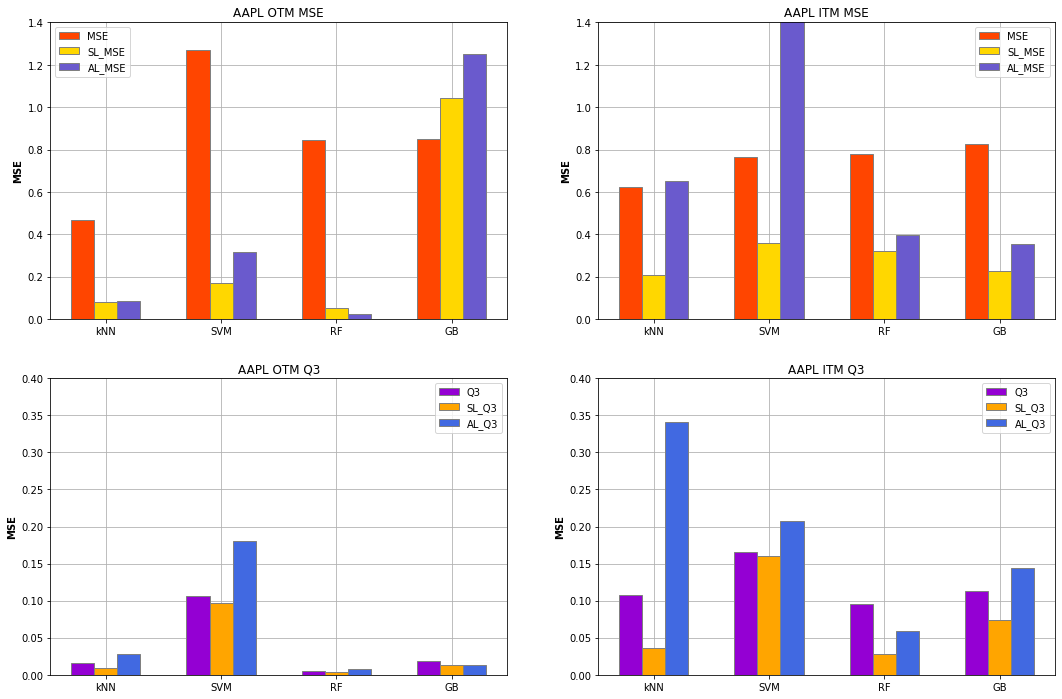

In [181]:
fig = plt.figure(figsize=(18, 12))
a = fig.add_subplot(221)
plotMSE(aaplo_mse_data, 'AAPL OTM MSE',a) 
b = fig.add_subplot(222)
plotMSE(aapli_mse_data, 'AAPL ITM MSE',b) 
c = fig.add_subplot(223)
plotQ3(aaplo_q3_data, 'AAPL OTM Q3',c) 
d = fig.add_subplot(224)
plotQ3(aapli_q3_data, 'AAPL ITM Q3',d) 

# DNN (TOO SLOW)

In [182]:
import tensorflow as tf
from tensorflow import feature_column
import tempfile
LABEL_COLUMN = "ImpliedVolatility"

CATEGORICAL_COLUMNS =  ['Ask',
                        'Bid',
                        'LastPrice',
                        'StockPrice',
                        'Strike',
                        'Volatility',
                        'Volume',
                        'time_to_maturity',
                        'ImpliedVolatility']
CONTINUOUS_COLUMNS = []
import tensorflow as tf
def input_fn(df):
    continous_cols = {k: tf.constant(df[k].values)
                     for k in CONTINUOUS_COLUMNS}
    categorical_cols = {k: tf.SparseTensor(
          indices=[[i, 0] for i in range(df[k].size)],
          values=df[k].astype(str).values,
          dense_shape=[df[k].size, 1]) for k in CATEGORICAL_COLUMNS}
    #feature_cols = continous_cols.items() | categorical_cols.items()
    continous_cols.update(categorical_cols)
    feature_cols = continous_cols
    label = tf.constant(df[LABEL_COLUMN].values)
    return feature_cols, label

def train_input_fn():
    return input_fn(Option_data[:20].drop(['DataType'],1))

def eval_input_fn():
    return input_fn(Option_data[1001:1010].drop(['DataType'],1))   

# categorical feature columns
Ask = feature_column.categorical_column_with_hash_bucket('Ask', 100)#dtype=tf.dtypes.string
Bid = feature_column.categorical_column_with_hash_bucket('Bid', 100)
LastPrice = feature_column.categorical_column_with_hash_bucket('LastPrice', 100)
StockPrice = feature_column.categorical_column_with_hash_bucket('StockPrice', 100)
Strike = feature_column.categorical_column_with_hash_bucket('Strike', 100)
Volatility = feature_column.categorical_column_with_hash_bucket('Volatility', 100)
Volume = feature_column.categorical_column_with_hash_bucket('Volume', 100)
time_to_maturity = feature_column.categorical_column_with_hash_bucket('time_to_maturity', 100) 

Ask_eb = feature_column.embedding_column(Ask, 9)
Bid_eb = feature_column.embedding_column(Bid, 9)
LastPrice_eb =feature_column.embedding_column(LastPrice, 9)
StockPrice_eb = feature_column.embedding_column(StockPrice, 9)
Strike_eb = feature_column.embedding_column(Strike, 9)
Volatility_eb = feature_column.embedding_column(Volatility, 9)
Volume_eb = feature_column.embedding_column(Volume, 9)
time_to_maturity_eb = feature_column.embedding_column(time_to_maturity, 9)

model_dir = tempfile.mkdtemp()
estimator = tf.estimator.DNNRegressor(
    hidden_units=[10,10],
    feature_columns =[Ask_eb, Bid_eb,LastPrice_eb, StockPrice_eb, Strike_eb, Volatility_eb, Volume_eb, time_to_maturity_eb],
    model_dir=model_dir
    )

# train model
estimator.train(input_fn=train_input_fn, steps=200,)

# evaluate model
metrics = estimator.evaluate(input_fn=eval_input_fn)
metrics

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmi3igj0y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


KeyboardInterrupt: ignored